In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import sys

import layers as layers
import util as util
import networks as networks

torch.set_default_dtype(torch.float64)

In [2]:
sys.path.insert(0, '../exp/')
import util as util_data

In [3]:
importlib.reload(layers)
importlib.reload(util)
importlib.reload(networks)

<module 'networks' from '/Users/beaucoker/Documents/git/VS-BNN/code/horseshoe/networks.py'>

### SIN dataset

In [4]:
n_obs = 100
dim_in = 2
Z, X, Y, sig2 = util_data.load_data('sin', n_obs=n_obs, dim_in=dim_in, sig2=.01, seed=0)


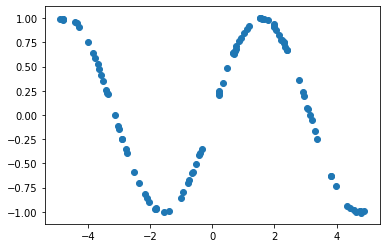

In [5]:
plt.scatter(Z[:,0],Y)

In [6]:
torch.manual_seed(2)
#model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2, infer_nu=False, nu=.5)
model = networks.RffHs(dim_in, 1, dim_hidden=50, sig2_inv=1/sig2, infer_nu=True)

In [7]:
torch.manual_seed(2)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
model.reinit_parameters(torch.from_numpy(Z),torch.from_numpy(Y),n_reinit=10) 

In [8]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.0043])
layer_in.lognu_logsig2 tensor([-9.0062])
layer_in.logeta_mu tensor([0.0144, 0.0056])
layer_in.logeta_logsig2 tensor([-8.9756, -8.9952])
layer_in.s_mu tensor([1.0007, 1.0005])
layer_in.s_logsig2 tensor([-9.0006, -9.0027])


Epoch[1/1000], kl: 21.778713, likelihood: 13.962484, elbo: -67.181327
Epoch[2/1000], kl: 21.791676, likelihood: 5.764077, elbo: -14.279675
Epoch[3/1000], kl: 21.803962, likelihood: 13.507880, elbo: 5.050646
Epoch[4/1000], kl: 21.819316, likelihood: -6.651180, elbo: -11.838286
Epoch[5/1000], kl: 21.841486, likelihood: 59.396591, elbo: -16.564061
Epoch[6/1000], kl: 21.858698, likelihood: 37.297998, elbo: 23.250190
Epoch[7/1000], kl: 21.880575, likelihood: 63.263552, elbo: 62.133299
Epoch[8/1000], kl: 21.900979, likelihood: 92.689531, elbo: 57.724936
Epoch[9/1000], kl: 21.923361, likelihood: 81.137115, elbo: 42.130350
Epoch[10/1000], kl: 21.954723, likelihood: 73.304302, elbo: 37.739964
Epoch[11/1000], kl: 21.978897, likelihood: 88.760574, elbo: -17.021174
Epoch[12/1000], kl: 22.008079, likelihood: 67.226345, elbo: 68.311241
Epoch[13/1000], kl: 22.034399, likelihood: 104.450654, elbo: 79.362244
Epoch[14/1000], kl: 22.066660, likelihood: 94.561827, elbo: 74.641920
Epoch[15/1000], kl: 22.09

Epoch[116/1000], kl: 24.978240, likelihood: 129.443494, elbo: 103.321481
Epoch[117/1000], kl: 24.975361, likelihood: 130.526336, elbo: 106.018531
Epoch[118/1000], kl: 24.929231, likelihood: 132.586344, elbo: 107.671946
Epoch[119/1000], kl: 24.867217, likelihood: 132.491754, elbo: 105.240131
Epoch[120/1000], kl: 24.816128, likelihood: 127.702097, elbo: 103.428713
Epoch[121/1000], kl: 24.771412, likelihood: 133.707510, elbo: 108.778909
Epoch[122/1000], kl: 24.738164, likelihood: 133.596253, elbo: 111.957271
Epoch[123/1000], kl: 24.688766, likelihood: 127.429061, elbo: 101.880389
Epoch[124/1000], kl: 24.616786, likelihood: 123.776417, elbo: 90.273985
Epoch[125/1000], kl: 24.587064, likelihood: 128.400686, elbo: 108.905203
Epoch[126/1000], kl: 24.541559, likelihood: 132.329394, elbo: 106.652392
Epoch[127/1000], kl: 24.494419, likelihood: 131.936937, elbo: 106.075300
Epoch[128/1000], kl: 24.478672, likelihood: 128.533333, elbo: 106.010146
Epoch[129/1000], kl: 24.406029, likelihood: 131.4197

Epoch[229/1000], kl: 21.891408, likelihood: 132.229176, elbo: 110.832082
Epoch[230/1000], kl: 21.849661, likelihood: 132.281572, elbo: 109.695637
Epoch[231/1000], kl: 21.800777, likelihood: 135.953481, elbo: 114.058939
Epoch[232/1000], kl: 21.782452, likelihood: 131.242248, elbo: 102.206353
Epoch[233/1000], kl: 21.780911, likelihood: 134.799005, elbo: 113.413931
Epoch[234/1000], kl: 21.741500, likelihood: 131.913957, elbo: 111.302208
Epoch[235/1000], kl: 21.785445, likelihood: 131.042428, elbo: 103.743205
Epoch[236/1000], kl: 21.764258, likelihood: 131.554920, elbo: 105.966540
Epoch[237/1000], kl: 21.747189, likelihood: 132.044391, elbo: 109.020984
Epoch[238/1000], kl: 21.699421, likelihood: 133.313509, elbo: 109.833361
Epoch[239/1000], kl: 21.691371, likelihood: 134.938850, elbo: 113.758594
Epoch[240/1000], kl: 21.648311, likelihood: 133.119872, elbo: 105.092613
Epoch[241/1000], kl: 21.669948, likelihood: 133.218481, elbo: 112.446883
Epoch[242/1000], kl: 21.637826, likelihood: 132.711

Epoch[342/1000], kl: 20.511207, likelihood: 128.439325, elbo: 109.529974
Epoch[343/1000], kl: 20.487890, likelihood: 134.979293, elbo: 115.506903
Epoch[344/1000], kl: 20.497244, likelihood: 130.661096, elbo: 113.637471
Epoch[345/1000], kl: 20.440264, likelihood: 132.012070, elbo: 114.056340
Epoch[346/1000], kl: 20.469508, likelihood: 120.220627, elbo: 106.200569
Epoch[347/1000], kl: 20.528929, likelihood: 128.004584, elbo: 111.302309
Epoch[348/1000], kl: 20.500818, likelihood: 127.671280, elbo: 96.298847
Epoch[349/1000], kl: 20.501123, likelihood: 129.117557, elbo: 112.360123
Epoch[350/1000], kl: 20.549376, likelihood: 134.279601, elbo: 113.277781
Epoch[351/1000], kl: 20.514743, likelihood: 131.744817, elbo: 111.969643
Epoch[352/1000], kl: 20.516055, likelihood: 133.458774, elbo: 111.994044
Epoch[353/1000], kl: 20.523500, likelihood: 133.488510, elbo: 109.925469
Epoch[354/1000], kl: 20.509075, likelihood: 122.484457, elbo: 93.010119
Epoch[355/1000], kl: 20.492498, likelihood: 126.97267

Epoch[455/1000], kl: 19.841002, likelihood: 132.016083, elbo: 112.269485
Epoch[456/1000], kl: 19.821839, likelihood: 134.446155, elbo: 105.691584
Epoch[457/1000], kl: 19.795166, likelihood: 129.350677, elbo: 112.814883
Epoch[458/1000], kl: 19.795433, likelihood: 132.021075, elbo: 110.568019
Epoch[459/1000], kl: 19.783160, likelihood: 137.000009, elbo: 117.116425
Epoch[460/1000], kl: 19.750127, likelihood: 133.120187, elbo: 109.749694
Epoch[461/1000], kl: 19.716295, likelihood: 128.648470, elbo: 89.690592
Epoch[462/1000], kl: 19.693943, likelihood: 127.254128, elbo: 111.162554
Epoch[463/1000], kl: 19.654621, likelihood: 130.181505, elbo: 112.894413
Epoch[464/1000], kl: 19.641512, likelihood: 132.290503, elbo: 112.739345
Epoch[465/1000], kl: 19.667444, likelihood: 133.217057, elbo: 114.046211
Epoch[466/1000], kl: 19.658844, likelihood: 134.736783, elbo: 111.162654
Epoch[467/1000], kl: 19.633509, likelihood: 132.716798, elbo: 115.380159
Epoch[468/1000], kl: 19.667140, likelihood: 127.1985

Epoch[568/1000], kl: 18.817945, likelihood: 134.242260, elbo: 115.306780
Epoch[569/1000], kl: 18.908585, likelihood: 134.812002, elbo: 115.888381
Epoch[570/1000], kl: 18.891495, likelihood: 134.401199, elbo: 110.421221
Epoch[571/1000], kl: 18.858841, likelihood: 131.429937, elbo: 111.226882
Epoch[572/1000], kl: 18.840344, likelihood: 128.894842, elbo: 110.715073
Epoch[573/1000], kl: 18.853002, likelihood: 133.665578, elbo: 114.336386
Epoch[574/1000], kl: 18.877627, likelihood: 124.749201, elbo: 108.780535
Epoch[575/1000], kl: 18.843257, likelihood: 133.849618, elbo: 111.128143
Epoch[576/1000], kl: 18.844581, likelihood: 130.122792, elbo: 108.942706
Epoch[577/1000], kl: 18.816651, likelihood: 127.754654, elbo: 114.327562
Epoch[578/1000], kl: 18.786084, likelihood: 131.790289, elbo: 112.327740
Epoch[579/1000], kl: 18.800245, likelihood: 129.378445, elbo: 112.080253
Epoch[580/1000], kl: 18.785547, likelihood: 124.307299, elbo: 117.020757
Epoch[581/1000], kl: 18.778792, likelihood: 128.947

Epoch[681/1000], kl: 18.652668, likelihood: 131.117462, elbo: 103.158769
Epoch[682/1000], kl: 18.660368, likelihood: 123.775353, elbo: 107.819443
Epoch[683/1000], kl: 18.643391, likelihood: 131.753128, elbo: 112.661306
Epoch[684/1000], kl: 18.634332, likelihood: 109.555914, elbo: 103.891269
Epoch[685/1000], kl: 18.641149, likelihood: 132.672464, elbo: 113.121967
Epoch[686/1000], kl: 18.653623, likelihood: 132.901198, elbo: 107.585239
Epoch[687/1000], kl: 18.655974, likelihood: 129.773772, elbo: 115.064905
Epoch[688/1000], kl: 18.638565, likelihood: 134.769163, elbo: 116.239717
Epoch[689/1000], kl: 18.622354, likelihood: 125.915715, elbo: 102.044645
Epoch[690/1000], kl: 18.586956, likelihood: 122.801391, elbo: 111.300647
Epoch[691/1000], kl: 18.577261, likelihood: 131.443067, elbo: 116.066801
Epoch[692/1000], kl: 18.547760, likelihood: 132.047011, elbo: 113.903760
Epoch[693/1000], kl: 18.554091, likelihood: 134.260188, elbo: 115.758914
Epoch[694/1000], kl: 18.508760, likelihood: 134.124

Epoch[794/1000], kl: 18.329797, likelihood: 131.773203, elbo: 94.533014
Epoch[795/1000], kl: 18.301400, likelihood: 134.693243, elbo: 115.923272
Epoch[796/1000], kl: 18.298393, likelihood: 133.782097, elbo: 115.024949
Epoch[797/1000], kl: 18.302123, likelihood: 133.303383, elbo: 115.237029
Epoch[798/1000], kl: 18.285028, likelihood: 135.992322, elbo: 118.523720
Epoch[799/1000], kl: 18.266192, likelihood: 132.127393, elbo: 116.038192
Epoch[800/1000], kl: 18.235312, likelihood: 127.375213, elbo: 109.939811
Epoch[801/1000], kl: 18.212845, likelihood: 129.623139, elbo: 111.479013
Epoch[802/1000], kl: 18.220850, likelihood: 129.599442, elbo: 111.331907
Epoch[803/1000], kl: 18.211763, likelihood: 118.086785, elbo: 113.472166
Epoch[804/1000], kl: 18.215650, likelihood: 132.466944, elbo: 113.874353
Epoch[805/1000], kl: 18.194031, likelihood: 134.109974, elbo: 112.088246
Epoch[806/1000], kl: 18.180145, likelihood: 121.758538, elbo: 114.146741
Epoch[807/1000], kl: 18.163755, likelihood: 133.7965

Epoch[907/1000], kl: 18.179021, likelihood: 135.113122, elbo: 116.189649
Epoch[908/1000], kl: 18.165835, likelihood: 131.020203, elbo: 114.524274
Epoch[909/1000], kl: 18.147941, likelihood: 134.832378, elbo: 116.121202
Epoch[910/1000], kl: 18.137977, likelihood: 121.340510, elbo: 115.562780
Epoch[911/1000], kl: 18.127638, likelihood: 133.030281, elbo: 111.072381
Epoch[912/1000], kl: 18.122379, likelihood: 128.531657, elbo: 110.771385
Epoch[913/1000], kl: 18.125762, likelihood: 135.214130, elbo: 116.974873
Epoch[914/1000], kl: 18.163287, likelihood: 125.051796, elbo: 112.220351
Epoch[915/1000], kl: 18.161762, likelihood: 127.357510, elbo: 113.397392
Epoch[916/1000], kl: 18.160799, likelihood: 131.920203, elbo: 117.561242
Epoch[917/1000], kl: 18.153582, likelihood: 132.748748, elbo: 115.566180
Epoch[918/1000], kl: 18.153213, likelihood: 127.017306, elbo: 115.080744
Epoch[919/1000], kl: 18.168378, likelihood: 129.054322, elbo: 113.803180
Epoch[920/1000], kl: 18.167559, likelihood: 129.042

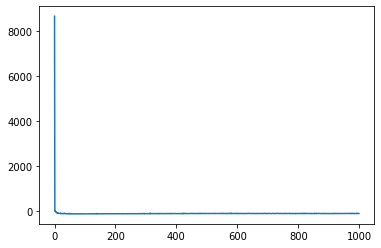

In [9]:
elbo = -networks.train(model, optimizer, torch.from_numpy(Z), torch.from_numpy(Y), n_epochs=1000, n_rep_opt=100, print_freq=1)
plt.plot(-elbo)

In [10]:
from math import sqrt

def estimate_psi(X=None, n_samp=1000):
    '''
    Use automatic gradients

    estimates mean and variance of variable importance psi
    X:  inputs to evaluate gradient
    n_samp:  number of MC samples
    '''

    X = torch.from_numpy(X)
    X.requires_grad = True

    psi_mean = torch.zeros(model.dim_in)
    psi_var = torch.zeros(model.dim_in)

    psi_samp = torch.zeros((n_samp, model.dim_in))
    for i in range(n_samp):

        f = model(X, weights_type_layer_in='sample_post', weights_type_layer_out='sample_post')
        torch.sum(f).backward()
        psi_samp[i,:] = torch.mean(X.grad**2,0)
        X.grad.zero_()

    psi_mean = torch.mean(psi_samp, 0)
    psi_var = torch.var(psi_samp, 0)

    return psi_mean.numpy(), psi_var.numpy()
    
def estimate_psi2(X=None, n_samp=1000):
    '''
    estimates mean and variance of variable importance psi
    X:  inputs to evaluate gradient
    n_samp:  number of MC samples
    '''
    with torch.no_grad():

        #breakpoint()

        dist_nu = torch.distributions.log_normal.LogNormal(loc=model.layer_in.lognu_mu, 
                                                           scale=model.layer_in.lognu_logsig2.exp().sqrt())

        dist_eta = torch.distributions.log_normal.LogNormal(loc=model.layer_in.logeta_mu, 
                                                            scale=model.layer_in.logeta_logsig2.exp().sqrt())

        dist_beta = torch.distributions.multivariate_normal.MultivariateNormal(loc=model.layer_out.mu, 
                                                                               covariance_matrix=model.layer_out.sig2)

        psi_mean = torch.zeros(model.dim_in)
        psi_var = torch.zeros(model.dim_in)
        for l in range(model.dim_in):

            # TO DO: replace loop for efficiency
            grad_samp = torch.zeros((n_samp, X.shape[0]))
            for i in range(n_samp):

                samp_nu = dist_nu.sample()
                samp_eta = dist_eta.sample()
                samp_beta = dist_beta.sample()

                nu_eta_w = samp_nu*samp_eta*model.layer_in.w

                grad_samp[i,:] = (-sqrt(2/model.dim_out) \
                                 *torch.sin(F.linear(torch.from_numpy(X), nu_eta_w, model.layer_in.b)) \
                                 @ torch.diag(nu_eta_w[:,l]) \
                                 @ samp_beta.T).reshape(-1)

            psi_samp = torch.mean(grad_samp**2,1)
            psi_mean[l] = torch.mean(psi_samp)
            psi_var[l] = torch.var(psi_samp)
            
            
            
    return psi_mean.numpy(), psi_var.numpy()


In [11]:
psi_mean, psi_var = estimate_psi(X=Z, n_samp=100)

In [12]:
psi_mean2, psi_var2 = estimate_psi2(X=Z, n_samp=100)

In [13]:
psi_mean, psi_var

(array([4.63818124e-01, 7.44832143e-06]),
 array([2.77351240e-04, 7.00934601e-10]))

In [14]:
psi_mean2, psi_var2

(array([1.92323619e+01, 3.12404624e-04]),
 array([4.79662460e-01, 4.41308193e-07]))

In [15]:
model.layer_in.lognu_logsig2.exp().sqrt()

tensor([0.0057], grad_fn=<SqrtBackward>)

In [16]:
model.layer_in.logeta_logsig2.exp().sqrt()

tensor([0.0057, 0.7155], grad_fn=<SqrtBackward>)

In [17]:
def plot_slice(model, x, y, dim=0, x_plot=None, x_plot_slice=0.0, n_samp=500, ax=None):
    with torch.no_grad():
    
        if ax is None:
            fig, ax = plt.subplots()
        dim_in = model.dim_in

        if x_plot is None:
            x_plot = torch.linspace(x.min(),x.max(),100)
            
        if type(x) is not np.ndarray:
            x = x.numpy()
            
        if type(y) is not np.ndarray:
            y = y.numpy()

        xx = x_plot_slice*torch.ones(x_plot.shape[0], dim_in)
        xx[:,dim] = x_plot.reshape(-1)

        f_pred_plot = model(xx, weights_type_layer_in='mean_post', weights_type_layer_out='mean_post').numpy() # posterior mean

        ax.scatter(x[:,dim], y) # training data
        ax.plot(xx[:,dim], f_pred_plot) # posterior mean

        # uncertainty
        f_samp_plot = np.zeros((n_samp, x_plot.shape[0]))
        for i in range(n_samp):
            f_samp_plot[i,:] = model(xx, weights_type_layer_in='sample_post', weights_type_layer_out='sample_post').numpy().reshape(-1)

        for q in [.025, .05, .1]:
            ci = np.quantile(f_samp_plot, [q, 1-q], axis=0)
            ax.fill_between(xx[:,0].reshape(-1), ci[0,:], ci[1,:], alpha=.1, color='blue')

            
def plot_slices(model, x, y, x_plot=None, x_plot_slice=0.0, n_samp=500, figsize=(4,4)):
    fig, ax = plt.subplots(1,model.dim_in, figsize=figsize, sharey=True)
    ax[0].set_ylabel('y')
    fig.suptitle("Posterior predictive (1d slices)")
    for dim in range(model.dim_in):
        plot_slice(model, x, y, dim, x_plot, x_plot_slice, n_samp, ax=ax[dim])
        ax[dim].set_xlabel('x'+str(dim))
    return fig, ax


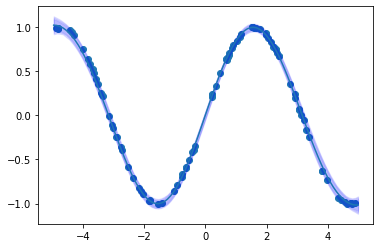

In [18]:
plot_slice(model, Z, Y, dim=0)

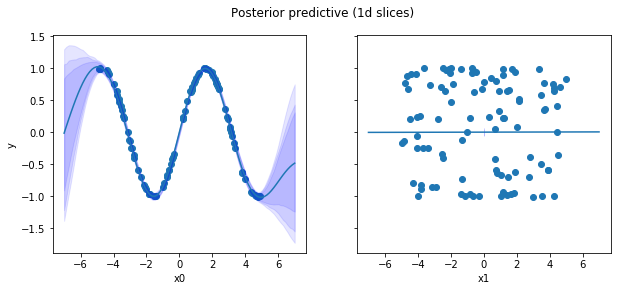

In [19]:
fig, ax = plot_slices(model, Z, Y, x_plot=torch.linspace(-7,7,100).reshape(-1,1), figsize=(10,4))

In [20]:
for name, p in model.named_parameters():
    print(name, p.detach())

layer_in.lognu_mu tensor([-0.4925])
layer_in.lognu_logsig2 tensor([-10.3218])
layer_in.logeta_mu tensor([-0.1170, -5.9951])
layer_in.logeta_logsig2 tensor([-10.3179,  -0.6695])
layer_in.s_mu tensor([1.1405, 0.7098])
layer_in.s_logsig2 tensor([-10.0742,  -0.3605])


In [21]:
with torch.no_grad():
    mu = model.layer_in.lognu_mu
    sig2 = model.layer_in.lognu_logsig2.exp()

    mean = torch.exp(mu + sig2/2)
    var = (torch.exp(sig2)-1)*torch.exp(2*mu+sig2)
mean

tensor([0.6111])

In [22]:
with torch.no_grad():
    mu = model.layer_in.logeta_mu
    sig2 = model.layer_in.logeta_logsig2.exp()

    mean = torch.exp(mu + sig2/2)
    var = (torch.exp(sig2)-1)*torch.exp(2*mu+sig2)
mean

tensor([0.8896, 0.0032])

In [27]:
var

tensor([2.7228e-05, 1.8268e-05])

Text(0, 0.5, 'horseshoe parameter (for variable selection)')

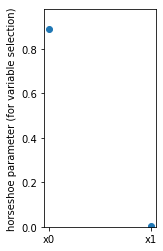

In [23]:
fig, ax = plt.subplots(figsize=(2,4))
ax.errorbar(np.arange(model.dim_in), mean.detach(), yerr=var.detach(), fmt='o')
ax.set_ylim(0,1.1*mean.max())
ax.set_xticks(np.arange(model.dim_in))
ax.set_xticklabels(['x'+str(z) for z in range(dim_in)])
ax.set_ylabel('horseshoe parameter (for variable selection)')

In [24]:
torch.distributions.kl_divergence?

In [27]:
from torch.distributions.beta import Beta

d1 = Beta(torch.tensor(.5), torch.tensor(.5))
d2 = Beta(torch.tensor(1.), torch.tensor(1.))

torch.distributions.kl_divergence(d1,d2)

tensor(0.2416)

In [49]:
a = nn.Parameter(torch.empty(1))
a.data = torch.tensor(1.0)

In [52]:
a.grad.zero_()

AttributeError: 'NoneType' object has no attribute 'zero_'

In [41]:
d1 = Beta(a, torch.tensor(.5))
d1.concentration1

tensor(1., grad_fn=<SelectBackward>)

In [43]:
a.data = torch.tensor(2.0)

In [44]:
d1.concentration1

tensor(1., grad_fn=<SelectBackward>)

In [46]:
optimizer?

#### GPy for comparison

In [29]:
import GPy
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)

In [30]:
m = GPy.models.GPRegression(Z,Y,kernel)

m.Gaussian_noise.variance = sig2
m.Gaussian_noise.fix()
m.optimize_restarts(num_restarts = 10, verbose=False)

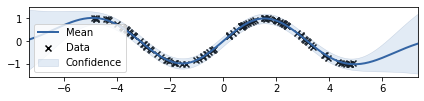

In [41]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

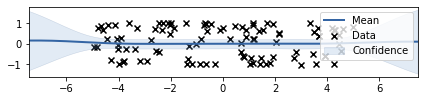

In [42]:
slices = [0]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=True)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')